In [1]:
import line_plot_oc
import line_plot_rec
%config InlineBackend.figure_format='retina'

In [146]:
identifier = 0

In [1]:
import pandas as pd
import numpy as np
import joblib
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
def rec_plot_info(x, y1, color_start, name_list, i, axes, identifier_name, metric):
    """
    Fixed format for plot drawing.
    """
    axes.plot(x, y1, 
              '-o', 
              color=sns.cubehelix_palette(10, 
                                          start=color_start, 
                                          rot=0, 
                                          dark=0.3, 
                                          light=.85, 
                                          reverse=True)[i], 
              markersize=10, 
              alpha=0.9, 
              label=name_list[i])
    
    axes.set_ylim(0, 1.1)
    axes.set_xlim(-2, 32)
    plt.legend()

    sns.despine()
    axes.set_ylabel('{}'.format(metric))
    axes.set_xlabel('KL Divergence between Source and Target – KL(P_0 & P_1 || P`_0 & P_i) - Reconstruction Model')
    axes.set_title('[{} v.s. KL(P_train || P_test)] - Normal: {}.'.format(metric, identifier_name))

In [144]:
def rec_line(identifier, metric='f1', range_='00_10'):
    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
    identifier_name = name_list[identifier]

    root = '/net/leksai/nips/result/fmnist'
    recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(identifier))['Reconstruction Model']
    ind_to_df_ind = {i: 'A/N = 0.1, Abnormal: {}'.format(i) for i in range(10)}

    ind_list_ = list(recall_rec.index)
    y_un = {k: {} for k in ind_list_}
    y_semi = {k: {} for k in ind_list_}

    for i in ind_list_:
        y_un[i] = [recall_rec.loc[i, 'A/N = 0']] * 9
        y_semi[i] = list(recall_rec[[ind_to_df_ind[i] for i in ind_list_]].loc[i, :])

    div_joint_rec = joblib.load('div_joint.pkl')
    div_margin_rec = joblib.load('div_margin.pkl')

    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

    x_joint = {k: {} for k in ind_list_}
    x_margin = {k: {} for k in ind_list_}

    for i in ind_list_:
        name = name_list[i]
        x_joint[i] = list(div_joint_rec[name].values())
        x_margin[i] = list(div_margin_rec[name].values())

    margin_test_for_identifier = joblib.load('margin_test_for_identifier.pkl')
    i_list = list(np.argsort(margin_test_for_identifier))
    i_list.remove(identifier)

    temp = []
    for i in i_list:
        temp.extend(x_joint[i])
    xlim_left = min(temp) - 2
    xlim_right = max(temp) + 2

    n = len(i_list)
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18, 9))
    plt.subplots_adjust(hspace=0.3)

    for ind, i in enumerate(i_list):
        recall_0 = np.array(y_un[i])
        precision_0 = 1000 * recall_0 / (1000 * recall_0 + 200)
        f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
        
        recall_1 = np.array(y_semi[i])
        precision_1 = 1000 * recall_1 / (1000 * recall_1 + 200)
        f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
        
        if metric == 'f1':
            y0 = f1_0
            y1 = f1_1
        
        if metric == 'recall':
            y0 = recall_0
            y1 = recall_1
        
        joint_x = np.array(x_joint[i])
        margin_x = np.array(x_margin[i])

        y1 = y1[np.argsort(joint_x)]
        joint_x = np.sort(joint_x)
        
        
        if range_ == '00_10':
            if (margin_test_for_identifier[i]) < 10:
                rec_plot_info(joint_x, y1, 2.6, name_list, i, axes, identifier_name, metric)
                
        elif range_ == '10_20':
            if ((margin_test_for_identifier[i]) > 10) & ((margin_test_for_identifier[i]) <= 20):
                rec_plot_info(joint_x, y1, 2, name_list, i, axes, identifier_name, metric)
        
        elif range_ == '20_30':
            if ((margin_test_for_identifier[i]) > 20) & ((margin_test_for_identifier[i]) <= 30):
                rec_plot_info(joint_x, y1, 1, name_list, i, axes, identifier_name, metric)
                
        elif range_ == '30_40':
            if ((margin_test_for_identifier[i]) > 30) & ((margin_test_for_identifier[i]) <= 40):
                rec_plot_info(joint_x, y1, 0.4, name_list, i, axes, identifier_name, metric)
        
        elif range_ == '40_50':
            if ((margin_test_for_identifier[i]) > 40) & ((margin_test_for_identifier[i]) <= 50):
                rec_plot_info(joint_x, y1, 0, name_list, i, axes, identifier_name, metric)

        elif range_ == '50_00':
                rec_plot_info(joint_x, y1, 1.3, name_list, i, axes, identifier_name, metric)

In [ ]:
def rec_line(identifier, metric='f1', range_='00_10'):
    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
    identifier_name = name_list[identifier]

    root = '/net/leksai/nips/result/fmnist'
    recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(identifier))['Reconstruction Model']
    ind_to_df_ind = {i: 'A/N = 0.1, Abnormal: {}'.format(i) for i in range(10)}

    ind_list_ = list(recall_rec.index)
    y_un = {k: {} for k in ind_list_}
    y_semi = {k: {} for k in ind_list_}

    for i in ind_list_:
        y_un[i] = [recall_rec.loc[i, 'A/N = 0']] * 9
        y_semi[i] = list(recall_rec[[ind_to_df_ind[i] for i in ind_list_]].loc[i, :])

    div_joint_rec = joblib.load('div_joint.pkl')
    div_margin_rec = joblib.load('div_margin.pkl')

    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

    x_joint = {k: {} for k in ind_list_}
    x_margin = {k: {} for k in ind_list_}

    for i in ind_list_:
        name = name_list[i]
        x_joint[i] = list(div_joint_rec[name].values())
        x_margin[i] = list(div_margin_rec[name].values())

    margin_test_for_identifier = joblib.load('margin_test_for_identifier.pkl')
    i_list = list(np.argsort(margin_test_for_identifier))
    i_list.remove(identifier)

    temp = []
    for i in i_list:
        temp.extend(x_joint[i])
    xlim_left = min(temp) - 2
    xlim_right = max(temp) + 2

    n = len(i_list)
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18, 9))
    plt.subplots_adjust(hspace=0.3)

    for ind, i in enumerate(i_list):
        recall_0 = np.array(y_un[i])
        precision_0 = 1000 * recall_0 / (1000 * recall_0 + 200)
        f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
        
        recall_1 = np.array(y_semi[i])
        precision_1 = 1000 * recall_1 / (1000 * recall_1 + 200)
        f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
        
        if metric == 'f1':
            y0 = f1_0
            y1 = f1_1
        
        if metric == 'recall':
            y0 = recall_0
            y1 = recall_1
        
        joint_x = np.array(x_joint[i])
        margin_x = np.array(x_margin[i])

        y1 = y1[np.argsort(joint_x)]
        joint_x = np.sort(joint_x)
        
        
        if range_ == '00_10':
            if (margin_test_for_identifier[i]) < 10:
                rec_plot_info(joint_x, y1, 2.6, name_list, i, axes, identifier_name, metric)
                
        elif range_ == '10_20':
            if ((margin_test_for_identifier[i]) > 10) & ((margin_test_for_identifier[i]) <= 20):
                rec_plot_info(joint_x, y1, 2, name_list, i, axes, identifier_name, metric)
        
        elif range_ == '20_30':
            if ((margin_test_for_identifier[i]) > 20) & ((margin_test_for_identifier[i]) <= 30):
                rec_plot_info(joint_x, y1, 1, name_list, i, axes, identifier_name, metric)
                
        elif range_ == '30_40':
            if ((margin_test_for_identifier[i]) > 30) & ((margin_test_for_identifier[i]) <= 40):
                rec_plot_info(joint_x, y1, 0.4, name_list, i, axes, identifier_name, metric)
        
        elif range_ == '40_50':
            if ((margin_test_for_identifier[i]) > 40) & ((margin_test_for_identifier[i]) <= 50):
                rec_plot_info(joint_x, y1, 0, name_list, i, axes, identifier_name, metric)

        elif range_ == '50_00':
                rec_plot_info(joint_x, y1, 1.3, name_list, i, axes, identifier_name, metric)

In [155]:
    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
    identifier_name = name_list[identifier]

    root = '/net/leksai/nips/result/fmnist'
    recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(identifier))['Reconstruction Model']
    ind_to_df_ind = {i: 'A/N = 0.1, Abnormal: {}'.format(i) for i in range(10)}

    ind_list_ = list(recall_rec.index)
    y_un = {k: {} for k in ind_list_}
    y_semi = {k: {} for k in ind_list_}

    for i in ind_list_:
        y_un[i] = [recall_rec.loc[i, 'A/N = 0']] * 9
        y_semi[i] = list(recall_rec[[ind_to_df_ind[i] for i in ind_list_]].loc[i, :])

    div_joint_rec = joblib.load('div_joint.pkl')
    div_margin_rec = joblib.load('div_margin.pkl')
    div_p1_pi_rec = joblib.load('div_margin_train.pkl')

    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

    x_joint = {k: {} for k in ind_list_}
    x_margin = {k: {} for k in ind_list_}
    x_p1_pi = {k: {} for k in ind_list_}

In [156]:
    for i in ind_list_:
        name = name_list[i]
        x_joint[i] = list(div_joint_rec[name].values())
        x_margin[i] = list(div_margin_rec[name].values())
        x_p1_pi[i] = list(div_p1_pi_rec[name].values())

In [164]:
def rec_line(identifier, goal='p1_pi__p0_p1', metric='f1', range_='00_10'):
    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
    identifier_name = name_list[identifier]

    root = '/net/leksai/nips/result/fmnist'
    recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(identifier))['Reconstruction Model']
    ind_to_df_ind = {i: 'A/N = 0.1, Abnormal: {}'.format(i) for i in range(10)}

    ind_list_ = list(recall_rec.index)
    y_un = {k: {} for k in ind_list_}
    y_semi = {k: {} for k in ind_list_}

    for i in ind_list_:
        y_un[i] = [recall_rec.loc[i, 'A/N = 0']] * 9
        y_semi[i] = list(recall_rec[[ind_to_df_ind[i] for i in ind_list_]].loc[i, :])

    div_joint_rec = joblib.load('div_joint.pkl')
    div_margin_rec = joblib.load('div_margin.pkl')
    div_p1_pi_rec = joblib.load('div_margin_train.pkl')

    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

    x_joint = {k: {} for k in ind_list_}
    x_margin = {k: {} for k in ind_list_}
    x_p1_pi = {k: {} for k in ind_list_}

    for i in ind_list_:
        name = name_list[i]
        x_joint[i] = list(div_joint_rec[name].values())
        x_margin[i] = list(div_margin_rec[name].values())
        x_p1_pi[i] = list(div_p1_pi_rec[name].values())

    margin_test_for_identifier = joblib.load('margin_test_for_identifier.pkl')
    i_list = list(np.argsort(margin_test_for_identifier))
    i_list.remove(identifier)

    temp = []
    for i in i_list:
        temp.extend(x_joint[i])
    xlim_left = min(temp) - 2
    xlim_right = max(temp) + 2

    n = len(i_list)
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18, 9))
    plt.subplots_adjust(hspace=0.3)

    for ind, i in enumerate(i_list):
        recall_0 = np.array(y_un[i])
        precision_0 = 1000 * recall_0 / (1000 * recall_0 + 100)
        f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
        
        recall_1 = np.array(y_semi[i])
        precision_1 = 1000 * recall_1 / (1000 * recall_1 + 100)
        f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
        
        if metric == 'f1':
            y0 = f1_0
            y1 = f1_1
        
        if metric == 'recall':
            y0 = recall_0
            y1 = recall_1
        
        joint_x = np.array(x_joint[i])
        margin_x = np.array(x_margin[i])
        p1_pi_x = np.array(x_p1_pi[i])
        p1_pi__p0_p1_x = p1_pi_x / margin_x

        
        if goal == 'joint':
            y1 = y1[np.argsort(joint_x)]
            x = np.sort(joint_x)

        if goal == 'p1_pi__p0_p1':
            y1 = y1[np.argsort(p1_pi__p0_p1_x)]
            x = np.sort(p1_pi__p0_p1_x)
            
        if range_ == '00_10':
            if (margin_test_for_identifier[i]) < 10:
                rec_plot_info(x, y1, 2.6, name_list, i, axes, identifier_name, metric)
                
        elif range_ == '10_20':
            if ((margin_test_for_identifier[i]) > 10) & ((margin_test_for_identifier[i]) <= 20):
                rec_plot_info(x, y1, 2, name_list, i, axes, identifier_name, metric)
        
        elif range_ == '20_30':
            if ((margin_test_for_identifier[i]) > 20) & ((margin_test_for_identifier[i]) <= 30):
                rec_plot_info(x, y1, 1, name_list, i, axes, identifier_name, metric)
                
        elif range_ == '30_40':
            if ((margin_test_for_identifier[i]) > 30) & ((margin_test_for_identifier[i]) <= 40):
                rec_plot_info(x, y1, 0.4, name_list, i, axes, identifier_name, metric)
        
        elif range_ == '40_50':
            if ((margin_test_for_identifier[i]) > 40) & ((margin_test_for_identifier[i]) <= 50):
                rec_plot_info(x, y1, 0, name_list, i, axes, identifier_name, metric)

        elif range_ == '50_00':
                rec_plot_info(x, y1, 1.3, name_list, i, axes, identifier_name, metric)

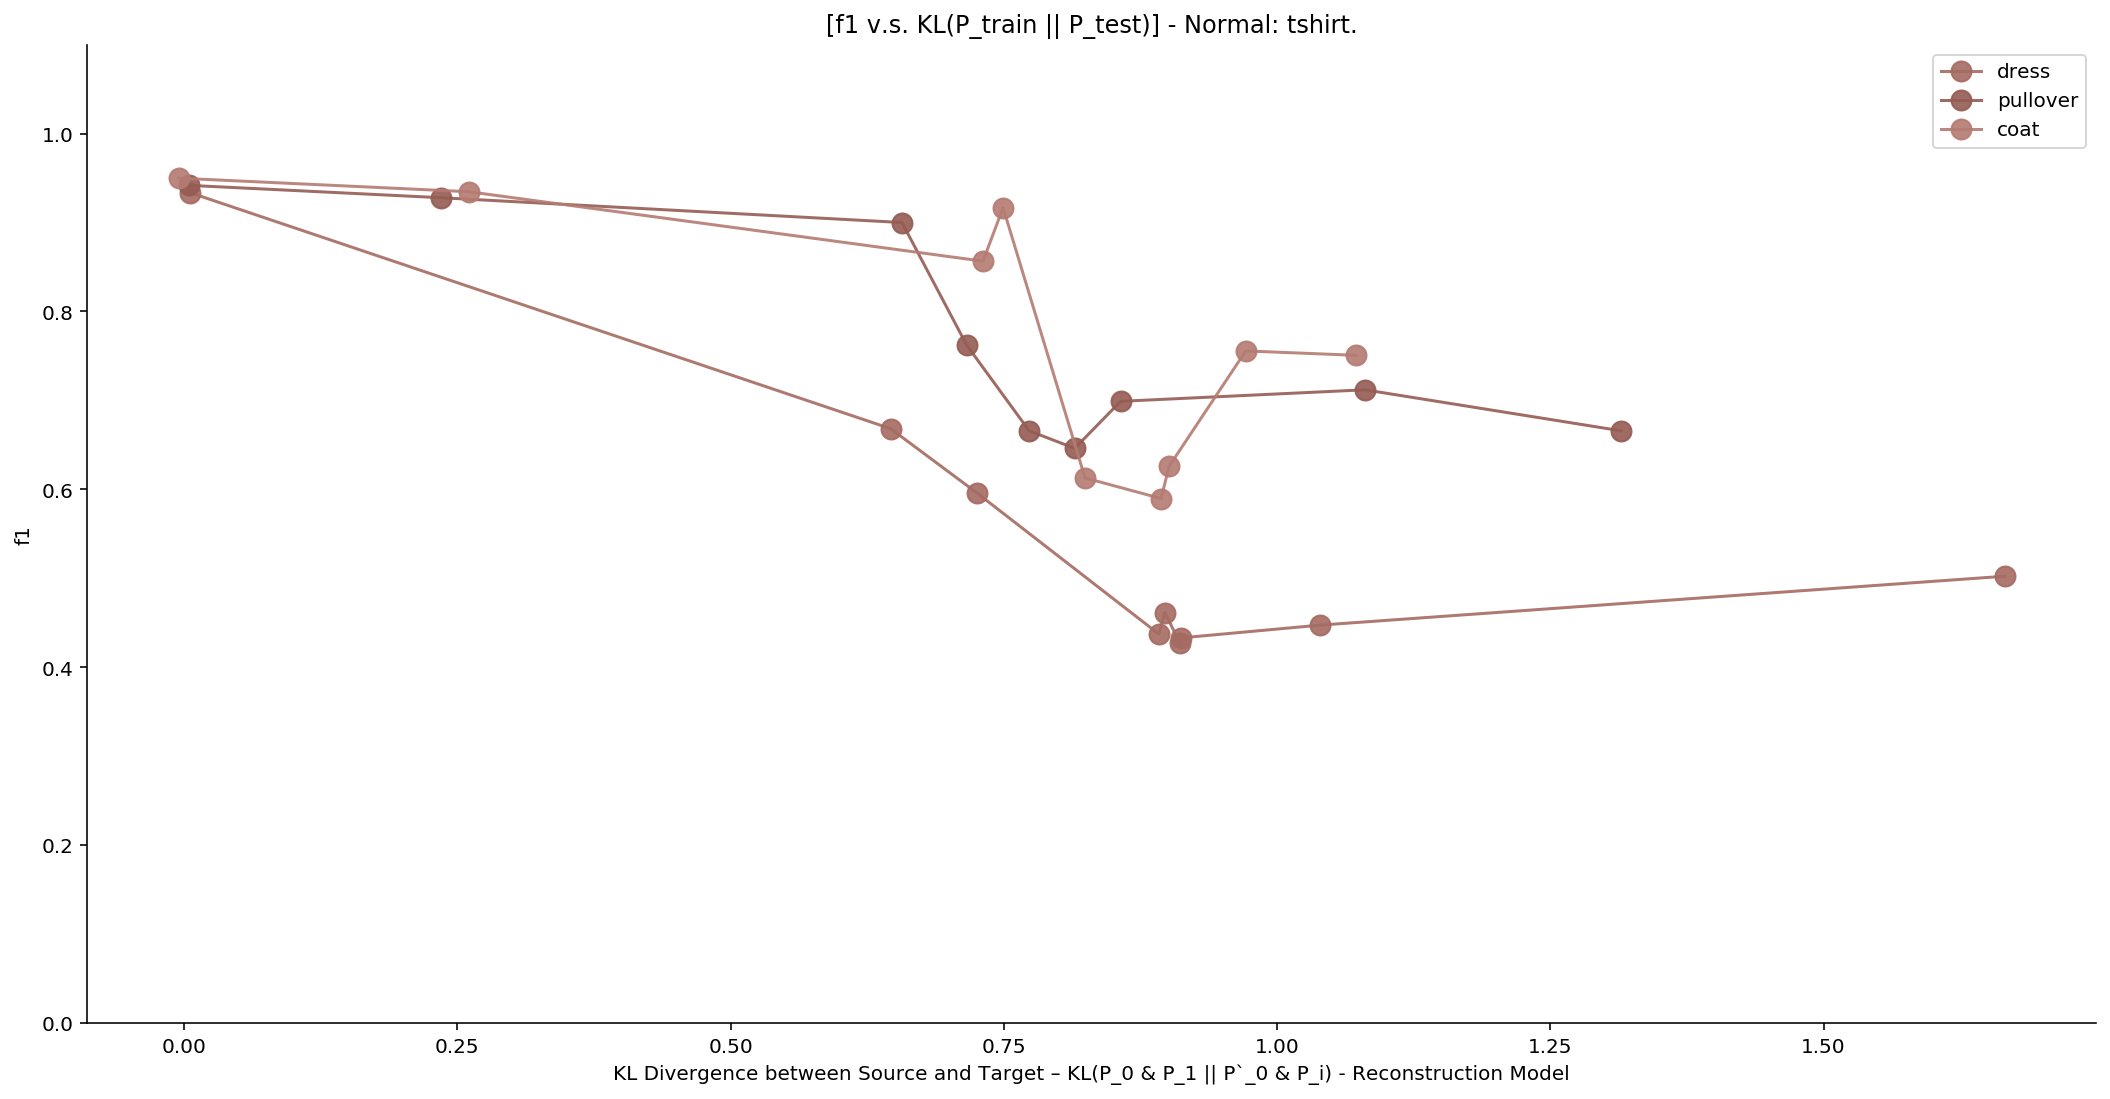

In [165]:
rec_line(0, range_='20_30')

In [106]:
recall = np.array([0.95] * 10)

In [111]:
recall = np.array([0.99, 0.95, 0.94, 0.33, 0.23, 0.77])

In [112]:
precision = 1000 * recall / (1000 * recall + 200)
f1 = 2 * (precision * recall) / (precision + recall)

In [113]:
precision

array([0.83193277, 0.82608696, 0.8245614 , 0.62264151, 0.53488372,
       0.79381443])

In [115]:
f1

array([0.90410959, 0.88372093, 0.87850467, 0.43137255, 0.32167832,
       0.78172589])